In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/YoselynR/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

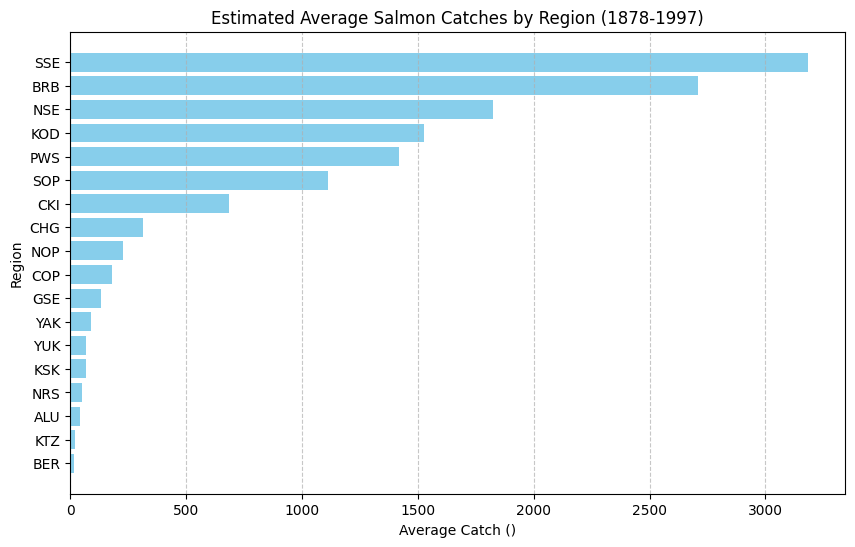

In [7]:
# FINAL CODE
import pandas as pd
catch_data = pd.read_csv('data/salmon_data.csv')
notes_unique = catch_data['notesRegCode'].unique()
catch_data = catch_data.drop(columns=['notesRegCode'])
catch_I = catch_data[catch_data['Catch'] == 'I'][['Region', 'Year', 'Species', 'Catch']]
catch_data['Catch'] = catch_data['Catch'].replace('I', 1)
catch_1 = catch_data[catch_data['Catch'] == 1][['Region', 'Year', 'Species', 'Catch']].iloc[0]
catch_data['Catch'] = catch_data['Catch'].astype('int64')
catch_column_type = catch_data['Catch'].dtype
avg_region = catch_data.groupby('Region')['Catch'].mean().reset_index()
import matplotlib.pyplot as plt
avg_region_sorted = avg_region.sort_values(by='Catch')
plt.figure(figsize=(10, 6))
plt.barh(avg_region_sorted['Region'], avg_region_sorted['Catch'], color='skyblue')
plt.title('Estimated Average Salmon Catches by Region (1878-1997)')
plt.xlabel('Average Catch ()')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [8]:
# a.
import pandas as pd
catch_data = pd.read_csv('data/salmon_data.csv') # Read in data from csv in data file
print(catch_data.head()) # Print first 5 rows

  Region  Year notesRegCode  Species Catch
0    SSE  1886          NaN  Chinook     0
1    SSE  1887          NaN  Chinook     0
2    SSE  1888          NaN  Chinook     0
3    SSE  1889          NaN  Chinook     0
4    SSE  1890          NaN  Chinook     0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [9]:
# b.
print(catch_data.info()) # Print class, number of rows, columns data types and names
print(catch_data.isnull().sum()) # Print sum of missing values per column
print(catch_data.nunique()) # Print number of unique values
print(catch_data.columns) # Print column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        8540 non-null   object
 1   Year          8540 non-null   int64 
 2   notesRegCode  1415 non-null   object
 3   Species       8540 non-null   object
 4   Catch         8540 non-null   object
dtypes: int64(1), object(4)
memory usage: 333.7+ KB
None
Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64
Region            18
Year             120
notesRegCode      29
Species            5
Catch           1879
dtype: int64
Index(['Region', 'Year', 'notesRegCode', 'Species', 'Catch'], dtype='object')


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

The exploration I decided to do was because I find it useful to know the column names, how many rows there are, column types, the number of missing values, and unique values per column. Knowing the column names are useful for different reasons but most importanly for me is knowing the right spelling. Knowing the number of rows is useful because the data could be small or large, this is the index and it can give an idea on how to handle the data. Knowing the column types is useful when needing to make changes to the dataframe or when using specific methods and functions. The number of missing values is useful because sometimes there are more NAs than expected which can cause issues. Knowing the unique values per column is useful to help identify how many different entry options are given in a particular column. This method is sensitive to whitespace, lettercase, and so it is necessary to explore further if needed. 

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [11]:
notes_unique = catch_data['notesRegCode'].unique() # Save unique values for sepcific column in the dataframe
print(notes_unique) # Print unique values saved

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [12]:
catch_data = catch_data.drop(columns=['notesRegCode']) # Remove specific column from dataframe

In [13]:
print(catch_data.columns) # Print columns and verify column is succesfully removed

Index(['Region', 'Year', 'Species', 'Catch'], dtype='object')


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


_Type your answer here, replacing this text._

In [14]:
print(catch_data.dtypes) # Print the column types

Region     object
Year        int64
Species    object
Catch      object
dtype: object


<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [16]:
catch_data['Catch'].astype('int64') # Convert specific object column type to integer type
# Error message is produced because the column has one misplaced string that contains a letter 

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [17]:
catch_I = catch_data[catch_data['Catch'] == 'I'][['Region', 'Year', 'Species', 'Catch']] # Save the subsetted boolean mask that checks the specific column (catch) for sepcific value (I), along with other columns (region, year, species) 
catch_I # Look at the saved row

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [18]:
catch_data['Catch'] = catch_data['Catch'].replace('I', 1) # Replace I with 1 for a specific column
catch_1 = catch_data[catch_data['Catch'] == 1][['Region', 'Year', 'Species', 'Catch']].iloc[0] # Save the subsetted boolean mask that checks the specific column (catch) for sepcific value (1), along with other columns (region, year, species), as a series 
catch_1 # Look at the series 

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [19]:
catch_data['Catch'] = catch_data['Catch'].astype('int64') # Convert specific column to integer type
catch_column_type = catch_data['Catch'].dtype # Save the column type
catch_column_type # Look at the saved column type

dtype('int64')

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [21]:
avg_region = catch_data.groupby('Region')['Catch'].mean().reset_index() # Save group by mean data of specific column (catch), along with another column (region), and reset index
avg_region # Look at saved averages

,Region,Catch
0,ALU,40.383908
1,BER,16.372549
2,BRB,2709.796491
3,CHG,315.487273
4,CKI,683.571429
5,COP,179.223404
6,GSE,133.841463
7,KOD,1528.350000
8,KSK,67.642353
9,KTZ,18.836145


<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

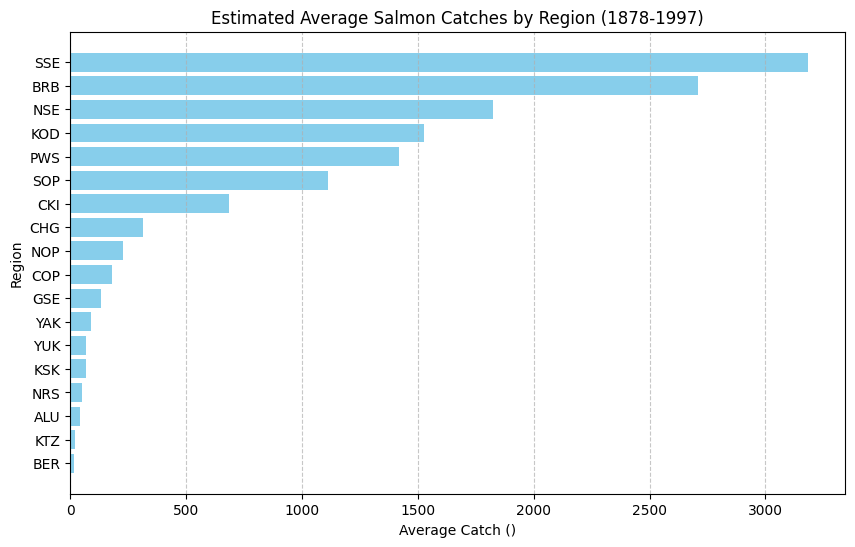

In [39]:
import matplotlib.pyplot as plt

avg_region_sorted = avg_region.sort_values(by='Catch')

plt.figure(figsize=(10, 6))
plt.barh(avg_region_sorted['Region'], avg_region_sorted['Catch'], color='skyblue')
plt.title('Estimated Average Salmon Catches by Region (1878-1997)')
plt.xlabel('Average Catch ()')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).